In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report


import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator 

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/hmnist_28_28_RGB[1].csv")

In [ ]:
data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,pixel0010,pixel0011,pixel0012,pixel0013,pixel0014,pixel0015,pixel0016,pixel0017,pixel0018,pixel0019,pixel0020,pixel0021,pixel0022,pixel0023,pixel0024,pixel0025,pixel0026,pixel0027,pixel0028,pixel0029,pixel0030,pixel0031,pixel0032,pixel0033,pixel0034,pixel0035,pixel0036,pixel0037,pixel0038,pixel0039,...,pixel2313,pixel2314,pixel2315,pixel2316,pixel2317,pixel2318,pixel2319,pixel2320,pixel2321,pixel2322,pixel2323,pixel2324,pixel2325,pixel2326,pixel2327,pixel2328,pixel2329,pixel2330,pixel2331,pixel2332,pixel2333,pixel2334,pixel2335,pixel2336,pixel2337,pixel2338,pixel2339,pixel2340,pixel2341,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,162,192,208,165,201,209,165,205,208,165,194,212,169,198,216,181,204,216,178,204,215,172,205,217,173,209,217,166,202,214,...,216,181,212,215,176,208,213,168,191,209,159,184,212,168,194,212,172,198,208,173,193,203,168,183,190,142,152,177,123,134,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,128,158,172,136,162,175,134,157,177,126,158,186,138,163,197,153,187,198,153,186,203,168,206,205,169,204,207,164,199,205,...,209,176,203,207,171,191,208,172,197,205,169,188,198,159,172,200,159,192,191,140,182,177,128,141,147,101,97,113,79,82,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,149,165,207,149,159,209,156,164,202,136,130,200,133,129,208,146,157,212,159,167,214,157,168,211,143,150,215,148,169,213,...,221,168,175,222,170,188,221,167,184,203,144,155,201,146,155,210,163,177,190,142,152,192,152,172,194,153,176,178,134,149,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,125,134,177,118,123,190,137,146,192,127,143,200,141,162,207,156,170,202,144,151,202,138,155,212,159,177,211,155,172,211,...,181,137,145,189,147,166,192,157,185,169,129,144,148,114,122,157,125,137,157,127,147,154,128,147,130,102,114,87,63,73,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,179,214,232,189,222,235,193,219,234,191,206,238,200,219,244,213,240,243,213,239,242,210,238,244,216,241,247,224,244,246,...,238,195,209,237,191,200,238,194,201,239,197,216,238,195,219,232,179,201,217,150,173,224,171,207,227,177,206,222,178,201,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,168,182,181,157,162,205,179,188,221,199,214,224,202,215,226,201,205,223,198,206,230,207,219,228,201,211,229,203,210,223,...,225,197,195,222,193,193,228,199,202,231,202,204,227,203,206,230,211,219,231,217,223,222,204,207,202,179,180,205,180,181,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,111,107,130,108,104,136,112,111,148,125,125,155,132,134,157,132,132,164,138,137,187,161,161,198,172,173,202,175,175,209,...,207,179,179,195,164,162,197,168,169,203,176,180,192,165,165,188,162,162,184,162,164,185,162,163,161,137,135,155,132,129,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,164,167,195,173,175,210,191,199,212,195,201,210,189,193,218,194,203,217,191,195,217,195,199,224,201,203,236,211,215,250,...,200,169,165,217,183,179,241,211,210,242,216,215,239,214,213,234,208,208,224,198,196,206,180,177,226,202,201,214,192,190,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,124,142,173,134,149,177,139,156,181,141,159,183,137,154,185,139,160,185,145,165,186,148,162,189,157,170,190,155,169,191,...,189,141,159,192,167,179,193,173,183,192,171,181,190,164,171,190,162,171,190,168,179,194,177,187,192,170,180,186,163,165,185,162,167,184,157,166,185,162,172,0

In [ ]:
class0=data[data['label']==0]
class1=data[data['label']==1]
class2=data[data['label']==2]
class3=data[data['label']==3]
class4=data[data['label']==4]
class5=data[data['label']==5]
class6=data[data['label']==6]

In [ ]:
class1.shape


(514, 2353)

In [ ]:
data['label'].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [ ]:
class0=class0.drop('label', axis=1).copy()
class1=class1.drop('label', axis=1).copy()
class2=class2.drop('label', axis=1).copy()
class3=class3.drop('label', axis=1).copy()
class4=class4.drop('label', axis=1).copy()
class5=class5.drop('label', axis=1).copy()
class6=class6.drop('label', axis=1).copy()

In [ ]:
class0 = np.array(class0)
class0 = class0.reshape(-1, 28, 28, 3)
class1 = np.array(class1)
class1 = class1.reshape(-1, 28, 28, 3)
class2 = np.array(class2)
class2 = class2.reshape(-1, 28, 28, 3)
class3 = np.array(class3)
class3 = class3.reshape(-1, 28, 28, 3)
class4 = np.array(class4)
class4 = class4.reshape(-1, 28, 28, 3)
class5 = np.array(class5)
class5 = class5.reshape(-1, 28, 28, 3)
class6 = np.array(class6)
class6 = class6.reshape(-1, 28, 28, 3)

In [ ]:
class6_a=class6
class6_b=class6[:,::-1,:,:]
class6_c=class6[:,:,::-1,:]
class6_d=np.transpose(class6_a,(0,2,1,3))
class6_e=np.transpose(class6_b,(0,2,1,3))
class6_f=np.transpose(class6_c,(0,2,1,3))

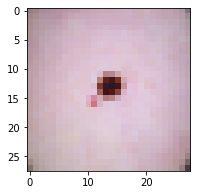

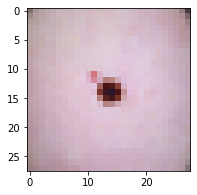

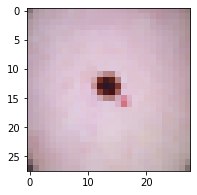

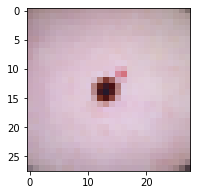

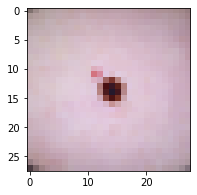

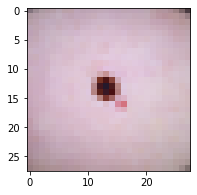

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(class6_a[0])
plt.figure(figsize=(3,3))
plt.imshow(class6_b[0])
plt.figure(figsize=(3,3))
plt.imshow(class6_c[0])
plt.figure(figsize=(3,3))
plt.imshow(class6_d[0])
plt.figure(figsize=(3,3))
plt.imshow(class6_e[0])
plt.figure(figsize=(3,3))
plt.imshow(class6_f[0])

In [ ]:
class0_a=class0
class0_b=class0[:,::-1,:,:]
class0_c=class0[:,:,::-1,:]
class0_d=np.transpose(class0_a,(0,2,1,3))
class0_e=np.transpose(class0_b,(0,2,1,3))
class0_f=np.transpose(class0_c,(0,2,1,3))

class1_a=class1
class1_b=class1[:,::-1,:,:]
class1_c=class1[:,:,::-1,:]
class1_d=np.transpose(class1_a,(0,2,1,3))
class1_e=np.transpose(class1_b,(0,2,1,3))
class1_f=np.transpose(class1_c,(0,2,1,3))

class2_a=class2
class2_b=class2[:,::-1,:,:]
class2_c=class2[:,:,::-1,:]
class2_d=np.transpose(class2_a,(0,2,1,3))
class2_e=np.transpose(class2_b,(0,2,1,3))
class2_f=np.transpose(class2_c,(0,2,1,3))

class3_a=class3
class3_b=class3[:,::-1,:,:]
class3_c=class3[:,:,::-1,:]
class3_d=np.transpose(class3_a,(0,2,1,3))
class3_e=np.transpose(class3_b,(0,2,1,3))
class3_f=np.transpose(class3_c,(0,2,1,3))

class5_a=class5
class5_b=class5[:,::-1,:,:]
class5_c=class5[:,:,::-1,:]
class5_d=np.transpose(class5_a,(0,2,1,3))
class5_e=np.transpose(class5_b,(0,2,1,3))
class5_f=np.transpose(class5_c,(0,2,1,3))

In [ ]:
class_0=np.concatenate([class0_a,class0_b,class0_c,class0_d,class0_e,class0_f])

In [ ]:
class_0=np.concatenate([class0_a,class0_b,class0_c,class0_d,class0_e,class0_f])
class_1=np.concatenate([class1_a,class1_b,class1_c,class1_d,class1_e,class1_f])
class_2=np.concatenate([class2_a,class2_b,class2_c,class2_d,class2_e,class2_f])
class_4=class4
class_3=np.concatenate([class3_a,class3_b,class3_c,class3_d,class3_e,class3_f])
class_5=np.concatenate([class5_a,class5_b,class5_c,class5_d,class5_e,class5_f])
class_6=np.concatenate([class6_a,class6_b,class6_c,class6_d,class6_e,class6_f])

In [ ]:
print(class_0.shape)
print(class_1.shape)
print(class_2.shape)
print(class_3.shape)
print(class_4.shape)
print(class_5.shape)
print(class_6.shape)

(1962, 28, 28, 3)
(3084, 28, 28, 3)
(6594, 28, 28, 3)
(690, 28, 28, 3)
(6705, 28, 28, 3)
(852, 28, 28, 3)
(6678, 28, 28, 3)


In [ ]:
X=np.concatenate([class_0,class_1,class_2,class_3,class_4,class_5,class_6])
X.shape

(26565, 28, 28, 3)

In [ ]:
y0=[0]*1962
y0 = np.array(y0)
y1=[1]*3084
y1 = np.array(y1)
y2=[2]*6594
y2 = np.array(y2)
y3=[3]*690
y3 = np.array(y3)
y4=[4]*6705
y4 = np.array(y4)
y5=[5]*852
y5 = np.array(y5)
y6=[6]*6678
y6 = np.array(y6)

In [ ]:
y=np.concatenate([y0,y1,y2,y3,y4,y5,y6])
y.shape

(26565,)

In [ ]:
class0


array([[[[ 30,  15,  20],
         [ 35,  19,  27],
         [ 94,  69,  73],
         ...,
         [ 77,  47,  54],
         [ 63,  36,  44],
         [ 44,  23,  31]],

        [[ 25,  12,  17],
         [ 62,  43,  52],
         [132, 102, 102],
         ...,
         [ 74,  46,  52],
         [ 68,  40,  47],
         [ 50,  27,  35]],

        [[ 35,  20,  25],
         [105,  80,  76],
         [164, 134, 134],
         ...,
         [ 65,  39,  47],
         [ 70,  42,  49],
         [ 55,  31,  39]],

        ...,

        [[ 73,  44,  53],
         [ 80,  50,  60],
         [128,  99,  95],
         ...,
         [ 29,  15,  18],
         [ 18,   7,  11],
         [ 10,   0,   3]],

        [[ 77,  46,  54],
         [ 76,  45,  55],
         [ 94,  64,  71],
         ...,
         [ 26,  13,  16],
         [ 15,   4,   7],
         [  9,   0,   0]],

        [[ 72,  42,  48],
         [ 80,  49,  56],
         [ 77,  46,  56],
         ...,
         [ 22,   9,  13],
        

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21252, 28, 28, 3)
(21252,)
(5313, 28, 28, 3)
(5313,)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 3)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 16)        448       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 13, 13, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 11, 11, 32)        4640      
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 5, 5, 32)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 3, 3, 64)          18496     
_________________________________________________________________
maxpool3 (MaxPooling2D)      (None, 1, 1, 64)          0     

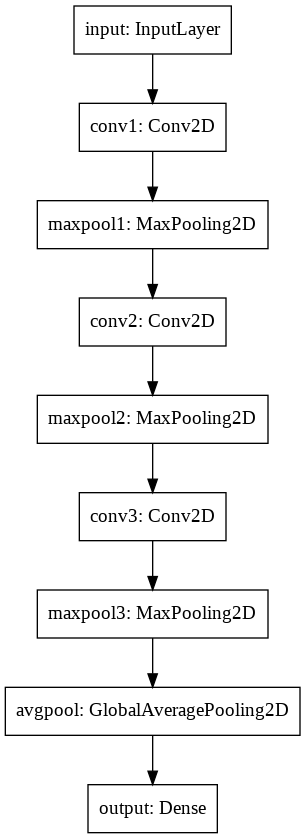

In [ ]:
inputs= tf.keras.Input(shape=(28,28,3), name='input')

conv1= tf.keras.layers.Conv2D(filters= 16, kernel_size= 3, name= 'conv1')(inputs)

maxpool1= tf.keras.layers.MaxPooling2D(name= 'maxpool1')(conv1)

conv2= tf.keras.layers.Conv2D(filters=32, kernel_size=3, name='conv2')(maxpool1)

maxpool2= tf.keras.layers.MaxPooling2D(name= 'maxpool2')(conv2)

conv3= tf.keras.layers.Conv2D(filters= 64, kernel_size=3, name='conv3')(maxpool2)

maxpool3= tf.keras.layers.MaxPooling2D(name='maxpool3')(conv3)

avgpool= tf.keras.layers.GlobalAveragePooling2D(name='avgpool')(maxpool3)

outputs= tf.keras.layers.Dense(7, activation='softmax', name='output')(avgpool)

model= tf.keras.Model(inputs= inputs, outputs= outputs)

print(model.summary())

tf.keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size= 32
epochs= 50

history= model.fit(X_train,y_train, validation_split=0.37,batch_size= batch_size,epochs=epochs,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)])

Epoch 1/50
419/419 [==============================] - 11s 25ms/step - loss: 0.8183 - accuracy: 0.6900 - val_loss: 1.3485 - val_accuracy: 0.5354
Epoch 2/50
419/419 [==============================] - 10s 25ms/step - loss: 0.7673 - accuracy: 0.7100 - val_loss: 1.4028 - val_accuracy: 0.5509
Epoch 3/50
419/419 [==============================] - 11s 25ms/step - loss: 0.7333 - accuracy: 0.7245 - val_loss: 1.4499 - val_accuracy: 0.5346
Epoch 4/50
419/419 [==============================] - 11s 25ms/step - loss: 0.6799 - accuracy: 0.7459 - val_loss: 1.6090 - val_accuracy: 0.5287
Epoch 5/50
419/419 [==============================] - 11s 26ms/step - loss: 0.6665 - accuracy: 0.7469 - val_loss: 1.5068 - val_accuracy: 0.5310
Epoch 6/50
419/419 [==============================] - 11s 25ms/step - loss: 0.6059 - accuracy: 0.7703 - val_loss: 1.6627 - val_accuracy: 0.5127
Epoch 7/50
419/419 [==============================] - 11s 25ms/step - loss: 0.5933 - accuracy: 0.7773 - val_loss: 1.5813 - val_accuracy: